## $$\Large \text{Getting started with the Keras Sequential model} $$   
$$\large \text {Binh Tran - source: https://keras.io/ } $$

$\Large ✔︎$ The `Sequential` model is a linear stack of layers.

$\large ~~~~❍~$Passing a list of layer instances to the constructor:

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

$\large ~~~~❍~$ Add layers via the `.add()` method

In [9]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

# Specifying the input shape

$\large ✔︎$ The **first layer** in a `Sequential` model (and only the first, because following layers can do automatic shape inference) **needs** to receive information about **its input shape** 

$\large ✔︎$ There are several possible ways to do this:

$\large ~~~~❍~$**Pass** an `input_shape` argument to the **first layer**
>* This is a shape tuple:
>      * a tuple of integers
>      * or `None` entries
>* In `input_shape`, the **batch dimension is not included.**

$\large ~~~~❍~$ Some **2D layers**, such as `Dense`, input shape via the argument `input_dim`   
$\large ~~~~❍~$ Some **3D layers**, arguments `input_dim` and `input_length`

$\large ~~~~❍~$If use a fixed `batch size` for inputs (this is useful for stateful recurrent networks), pass a `batch_size` argument to a layer.     
$\large ~~~~❍~$If you pass both `batch_size`=32 and `input_shape`=(6, 8) to a layer $\Rightarrow$ expect every batch of inputs to have the batch shape (32, 6, 8).

```python
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
```

```python
model = Sequential()
model.add(Dense(32, input_dim=784))
```

# Compilation

Before training a model, you need to configure the learning process, which is done via the `compile` method. 

## Arguments

$\large ✔︎$ An optimizer:    
$\large ~~~~❍~$ **String identifier** of an existing optimizer, such as `rmsprop` or `adagrad`    
$\large ~~~~❍~$ Or an **instance** of the **Optimizer class**. See [optimizer](https://keras.io/optimizers)    
$\large ✔︎$ A loss function.    
$\large ~~~~❍~$ **String identifier** of an existing loss function, such as `categorical_crossentropy` or `mse`   
$\large ~~~~❍~$ Or an **instance** an objective function. See: [losses](https://keras.io/losses)   
$\large ✔︎$ A list of metrics. See [metrics](https://keras.io/metrics/)    
$\large ~~~~❍~$ For any classification problem you will want to set this to `metrics=['accuracy'].`    
$\large ~~~~❍~$ **String identifier** of an existing metric or a **custom metric function**

```python
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

```python
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

```python
# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')
```

```python
# For custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])
```

# Training

Keras models are trained on Numpy arrays of i**nput data** and **labels**.     
For **training a model**, you will typically use the `fit` function. 

In [10]:
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.utils.vis_utils import plot_model


In [21]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [31]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)


Epoch 1/10
1000/1000 [==============================] - 0s 335us/step - loss: 0.7226 - accuracy: 0.4840
Epoch 2/10
1000/1000 [==============================] - 0s 165us/step - loss: 0.7006 - accuracy: 0.5050
Epoch 3/10
1000/1000 [==============================] - 0s 163us/step - loss: 0.6908 - accuracy: 0.5490
Epoch 4/10
1000/1000 [==============================] - 0s 174us/step - loss: 0.6878 - accuracy: 0.5440
Epoch 5/10
1000/1000 [==============================] - 0s 175us/step - loss: 0.6823 - accuracy: 0.5680
Epoch 6/10
1000/1000 [==============================] - 0s 168us/step - loss: 0.6792 - accuracy: 0.5620
Epoch 7/10
1000/1000 [==============================] - 0s 161us/step - loss: 0.6726 - accuracy: 0.5900
Epoch 8/10
1000/1000 [==============================] - 0s 167us/step - loss: 0.6700 - accuracy: 0.5940
Epoch 9/10
1000/1000 [==============================] - 0s 168us/step - loss: 0.6673 - accuracy: 0.5970
Epoch 10/10
1000/1000 [==============================] - 0s 177u

# Examples

## Example models for real datasets:

$\large ❏~$ **CIFAR10** small images classification: Convolutional Neural Network (CNN) with realtime data augmentation   
$\large ❏~$ **IMDB** movie review sentiment classification: LSTM over sequences of words   
$\large ❏~$ Reuters newswires topic classification: Multilayer Perceptron (MLP)   
$\large ❏~$ **MNIST** handwritten digits classification: MLP & CNN   
$\large ❏~$ Character-level text generation with LSTM   


# Multilayer Perceptron (MLP) for multi-class softmax classification:

``` python
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
```

# MLP for binary classification:

``` python
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
```

# VGG-like convnet:

```python
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)
```

# Sequence classification with LSTM:

```python
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)
```

# Sequence classification with 1D convolutions:

```python
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

seq_length = 64

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)
```

# Stacked LSTM for sequence classification

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='LSTM_model_plot.png', show_shapes=True, show_layer_names=True)

<img src='./LSTM_model_plot.png'>

In [ ]:
# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

# Same stacked LSTM model, rendered "stateful"

A stateful recurrent model is one for which the internal states (memories) obtained after processing a batch of samples are reused as initial states for the samples of the next batch. This allows to process longer sequences while keeping computational complexity manageable.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='LSTM_stateful_model_plot.png', show_shapes=True, show_layer_names=True)

<img src='./LSTM_stateful_model_plot.png'>

In [ ]:
# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))

model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))

In [14]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# model.fit(x_train, y_train, batch_size=32, epochs=10)
# score = model.evaluate(x_test, y_test, batch_size=32)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)       

Train on 75 samples, validate on 25 samples
Epoch 1/20
75/75 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 3.0552 - val_accuracy: 0.1200
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 3.0440 - val_accuracy: 0.1200
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.1480 - val_accuracy: 0.1600
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 9.1674e-04 - accuracy: 1.0000 - val_loss: 3.2440 - val_accuracy: 0.1600
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.2645 - val_accuracy: 0.2400
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.2492 - val_accuracy: 0.2800
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 3.

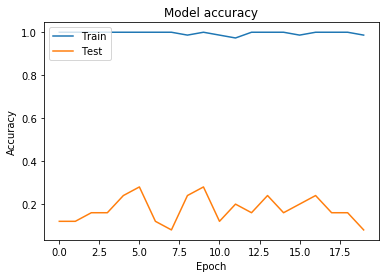

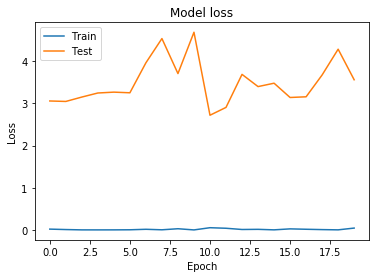

In [19]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, 
                    validation_split=0.25, epochs=20, batch_size=16, verbose=1)
print(history.history)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Fit vs Fit generator

In [22]:
from IPython.display import IFrame
IFrame('https://medium.com/difference-engine-ai/keras-a-thing-you-should-know-about-keras-if-you-plan-to-train-a-deep-learning-model-on-a-large-fdd63ce66bd2', width=1000, height=800)

# Usage of callbacks

## Create a callback

In [32]:
class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        print(f'bach: {batch}')

In [33]:
lossHistory = LossHistory()
history = model.fit(x_train, y_train, validation_split=0.25, epochs=20, batch_size=16, verbose=1, 
                    callbacks=[lossHistory])

print(history.history)

ValueError: Error when checking input: expected dense_18_input to have 2 dimensions, but got array with shape (100, 100, 100, 3)